In [1]:
import requests
import re
from requests.packages import urllib3
urllib3.disable_warnings() # 忽略证书警告

# get请求

In [2]:
r = requests.get('https://static1.scrape.cuiqingcai.com/',verify=False)
print(r.text)
print('=========================正则表达式抓取电影名字============================')
pattern = re.compile('<h2.*?>(.*?)</h2>', re.S)
titles = re.findall(pattern, r.text)
print(titles)

<html lang="en">
<head>
  
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width,initial-scale=1">
  <link rel="icon" href="/static/img/favicon.ico">
  <title>Scrape | Movie</title>
  

  <link href="/static/css/app.css" type="text/css" rel="stylesheet">
  
<link href="/static/css/index.css" type="text/css" rel="stylesheet">

</head>
<body>
<div id="app">
  <div data-v-74e8b908="" class="el-row" id="header">
    <div data-v-74e8b908="" class="container el-col el-col-18 el-col-offset-3">
      <div data-v-74e8b908="" class="el-row">
        <div data-v-74e8b908="" class="logo el-col el-col-4">
          <a data-v-74e8b908="" href="/" class="router-link-exact-active router-link-active">
            <img data-v-74e8b908="" src="/static/img/logo.png" class="logo-image">
            <span data-v-74e8b908="" class="logo-title">Scrape</span>
          </a>
        </div>
      </div>
    </div>
  </div>
  
<div dat

# 无参get

In [3]:
r = requests.get('http://httpbin.org/get')
print(r.text)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.26.0", 
    "X-Amzn-Trace-Id": "Root=1-6162cd2b-0d7046ab4ebaadc20c55f82d"
  }, 
  "origin": "111.3.212.41", 
  "url": "http://httpbin.org/get"
}



# 有参get

In [4]:
data = {
'name': 'germey',
'age': 25
}
r = requests.get('http://httpbin.org/get',params=data)
print(r.text)

{
  "args": {
    "age": "25", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.26.0", 
    "X-Amzn-Trace-Id": "Root=1-6162cd2c-00ac408d1fa6d2f21f9725c7"
  }, 
  "origin": "111.3.212.41", 
  "url": "http://httpbin.org/get?name=germey&age=25"
}



# **返回结果的json化处理**  
可以发现，调用 r.json()  方法，就可以将返回结果是 JSON  格式的字符串转化为字典。  
注意：如果返回结果不是 JSON  格式，使用 JSON方法 会出现解析错误，抛出 json.decoder.JSONDecodeError 异常。

In [5]:
print(f'原数据类型：{type(r.text)}')
print(r.json())
print(f'现数据类型：{type(r.json())}')

原数据类型：<class 'str'>
{'args': {'age': '25', 'name': 'germey'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.26.0', 'X-Amzn-Trace-Id': 'Root=1-6162cd2c-00ac408d1fa6d2f21f9725c7'}, 'origin': '111.3.212.41', 'url': 'http://httpbin.org/get?name=germey&age=25'}
现数据类型：<class 'dict'>


# 抓取图片的二进制数据

In [6]:
r = requests.get('https://github.com/favicon.ico')
print(r.text)
print('='*50)
print(r.content)

:�������O                                L������                                      ������                                        ������!                                ������4                                @���8���          
��������333                                                ���t�������+R������t                                                                `������R����������                                                                    �������������\                                                                        G������������                                                                           �����

In [7]:
# 保存二进制数据为图片
with open('github.ico', 'wb') as f:
    f.write(r.content)

# 添加 headers

In [8]:
head1 = {
    'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'
}
head2 = {
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'
}
r = requests.get(
    'https://static1.scrape.cuiqingcai.com/', 
    headers=head2,
    verify=False
)
print(r.text)

<html lang="en">
<head>
  
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width,initial-scale=1">
  <link rel="icon" href="/static/img/favicon.ico">
  <title>Scrape | Movie</title>
  

  <link href="/static/css/app.css" type="text/css" rel="stylesheet">
  
<link href="/static/css/index.css" type="text/css" rel="stylesheet">

</head>
<body>
<div id="app">
  <div data-v-74e8b908="" class="el-row" id="header">
    <div data-v-74e8b908="" class="container el-col el-col-18 el-col-offset-3">
      <div data-v-74e8b908="" class="el-row">
        <div data-v-74e8b908="" class="logo el-col el-col-4">
          <a data-v-74e8b908="" href="/" class="router-link-exact-active router-link-active">
            <img data-v-74e8b908="" src="/static/img/logo.png" class="logo-image">
            <span data-v-74e8b908="" class="logo-title">Scrape</span>
          </a>
        </div>
      </div>
    </div>
  </div>
  
<div dat

# POST请求

In [9]:
data = {'name': 'germey',
        'age': '25'}
r = requests.post('http://httpbin.org/post', data=data)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "age": "25", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "18", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.26.0", 
    "X-Amzn-Trace-Id": "Root=1-6162cd2d-228631110ff731b16a4ed15a"
  }, 
  "json": null, 
  "origin": "111.3.212.41", 
  "url": "http://httpbin.org/post"
}



# 响应Response
发送请求后，得到的自然就是响应，即 Response 。

In [10]:
r = requests.get('https://static1.scrape.cuiqingcai.com/',verify=False)
print(f'status_code：{type(r.status_code)} ||| {r.status_code}\n*********************************')
print(f'headers：{type(r.headers)} ||| {r.headers}\n*********************************')
print(f'cookies：{type(r.cookies)} ||| {r.cookies}\n*********************************')
print(f'url：{type(r.url)} ||| {r.url}\n*********************************')
print(f'history：{type(r.history)} ||| {r.history}\n*********************************')

status_code：<class 'int'> ||| 200
*********************************
headers：<class 'requests.structures.CaseInsensitiveDict'> ||| {'Date': 'Sun, 10 Oct 2021 11:23:26 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '41538', 'Connection': 'keep-alive', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'Expires': 'Sun, 10 Oct 2021 11:33:21 GMT', 'Cache-Control': 'max-age=600', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}
*********************************
cookies：<class 'requests.cookies.RequestsCookieJar'> ||| <RequestsCookieJar[]>
*********************************
url：<class 'str'> ||| https://static1.scrape.cuiqingcai.com/
*********************************
history：<class 'list'> ||| []
*********************************


## 比对返回的状态码与本地的状态码表

In [11]:
print('失败') if not r.status_code == requests.codes.ok else print('成功')



print(f'requests.codes.ok = {requests.codes.ok}')
print(f'requests.codes.not_found = {requests.codes.not_found}')
print(f'requests.codes.not_modified = {requests.codes.not_modified}')

成功
requests.codes.ok = 200
requests.codes.not_found = 404
requests.codes.not_modified = 304


# Requests高级用法

## 1.文件上传

In [12]:
f = {
    'file' : open('github.ico','rb')
}
r = requests.post('http://httpbin.org/post', files = f)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {
    "file": "data:application/octet-stream;base64,AAABAAIAEBAAAAEAIAAoBQAAJgAAACAgAAABACAAKBQAAE4FAAAoAAAAEAAAACAAAAABACAAAAAAAAAFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABERE3YTExPFDg4OEgAAAAAAAAAADw8PERERFLETExNpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQUFJYTExT8ExMU7QAAABkAAAAAAAAAAAAAABgVFRf/FRUX/xERE4UAAAAAAAAAAAAAAAAAAAAAAAAAABEREsETExTuERERHhAQEBAAAAAAAAAAAAAAAAAAAAANExMU9RUVF/8VFRf/EREUrwAAAAAAAAAAAAAAABQUFJkVFRf/BgYRLA4ODlwPDw/BDw8PIgAAAAAAAAAADw8PNBAQEP8VFRf/FRUX/xUVF/8UFBSPAAAAABAQEDAPDQ//AAAA+QEBAe0CAgL/AgIC9g4ODjgAAAAAAAAAAAgICEACAgLrFRUX/xUVF/8VFRf/FRUX/xERES0UFBWcFBQV/wEBAfwPDxH7DQ0ROwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0NEjoTExTnFRUX/xUVF/8SEhKaExMT2RUVF/8VFRf/ExMTTwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAERERTBUVF/8VFRf/ExMT2hMTFPYVFRf/FBQU8AAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAITExTxFRUX/xMTFPYTExT3FRUX/xQUFOEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFBQU4RUVF/8TExT3FBQU3hUVF/8TExT5Dw8PIQAAAAAAAAAAA

## 2.Cookies设置

In [13]:
# 获取百度的Cookies

r = requests.get('http://www.baidu.com')
print(r.cookies,'\n')
for key, value in r.cookies.items():
    print(f'key = {key}\nvalue = {value}')

<RequestsCookieJar[<Cookie BDORZ=27315 for .baidu.com/>]> 

key = BDORZ
value = 27315


+ 模拟用我的Cookies登陆github

In [14]:
# 直接填写cookies
headers = {
    'Cookie': '_device_id=c276c254d8c59e5e96cef03b9d4560a9; _octo=GH1.1.2045454243.1630765223; tz=Asia%2FShanghai; has_recent_activity=1; tz=Asia%2FShanghai; color_mode=%7B%22color_mode%22%3A%22auto%22%2C%22light_theme%22%3A%7B%22name%22%3A%22light%22%2C%22color_mode%22%3A%22light%22%7D%2C%22dark_theme%22%3A%7B%22name%22%3A%22dark%22%2C%22color_mode%22%3A%22dark%22%7D%7D; user_session=5BsdDA_m89o48jzHSk45z1WcI2f5XN9FTRCmlAoEZ3dLSsVG; __Host-user_session_same_site=5BsdDA_m89o48jzHSk45z1WcI2f5XN9FTRCmlAoEZ3dLSsVG; logged_in=yes; dotcom_user=Fangshenwei; _gh_sess=nr48ag4P8w9MJ1bIQ854RaeyWd7FD7Dy32vOeBQQwy4D%2BzSOUvP0u%2B9fx3HrRTMmbpueO1N7IJvL4neNYVcaVjdpDFy733dOfYfEWuldhDyPJBYmdqu%2BMoCnZU9PhVzBpw130gIseMsiaiV80pEUG9Pepu8A5ZjjD84IhwAVaLZOnnoaly1wSbWEM4FyZ%2FHjdgOUdt5YYHrjvY0DXnRcotgJqerO28D08C7bvOohm%2FpIozcFbzAxhYUY%2FY29so5AwSAnySCpq2eGsMk2wz0rnc5SC%2BZiNu0ejDsWJ1vrA2tuOPiwZuBa2tSlUrN%2FUjOSIBnELinaNs6kdTvo6zGmZzCrGSpeNGiFfoe3uTZuZPUqRmPw3sO7DtP4A7Y8FuTvaa3ImXq1%2F%2FQqQvXARmfrbBGEaaon28xAUj4DmhzlRZc10HN7JYsuEkgfCRQTcXZekHwCI7KDMkkiVj4akHvyzDHkyoeEySYC9khFXPnH5qJ8nh3zjRks4vbVLmgedMJ66Rhpl89XM9ZfCyVxi4J7KVuLhmHCyWeXvNUiFwYciB4Hl5APsMre2gmDQ85K74E92Qk8QTazZHT7M1oc0RC3BNNj3R%2BHE9PJVgJ1vaawynI7dXs3S12xny9scNES97UpVVFVUWzf8dC7iACPUDf2cuf1rQWny2yGYfrmz47w4KJwdHkKDhUU0yDFQLUBG%2FlLmVxBc40F9urd7E7h3DlA9nQ47W%2FyBSVcf57gci4CVj3wHcDOJQhZ87RF0ytBD%2BQG8QjQ0OoIjzRbPSkQFP%2BxLB7wP1HXdbqvE9ZZPvlbi2EBVUgcpWKPmpdQM3ter5nZT5m%2Fw5MQZfDNXyRzx3sOMY%2BjBtg666e06%2F7UVYh7k%2BSVZt2VR5NIYnoFzgdJQXTjYDsxI6ZKLxqhtMGqIixU1HUhDTTBFJJ1cDOJ%2Bfuc2SjnyBXYY9TOzP7NiCQXM%2FE5XmOR6FogXhMaTq%2FR6cJSr7iDKBetyGDFR9McEz2jukpmQtUdYoPk6GFdzwNYb6rfXbuTX2lXU1hVonQ0QqPGxGvcoxaGzRtZhplgKLXbe9XlvNxu1nRDrw0wa6F%2BWvudAgrEn5aYfMM%2FiXpR0V9zaImPh%2BshFBJ2AEw5Fs16SVM%3D--tUN2w11Tj5KdUJDQ--rYW5JyYqQ6tXAFkPniB3RQ%3D%3D',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.116 Safari/537.36'
}
r = requests.get('https://github.com/', headers=headers)
print(r.text)




<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">



  <link crossorigin="anonymous" media="all" integrity="sha512-d4XC7S3D2O/G0TvZjbbtWpDgCLyqvsXCX4K0DUJVfSwpV8ySOlchU43C/9mcyyHtCnczq4eoCl/e3fzC9uXxGA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-7785c2ed2dc3d8efc6d13bd98db6ed5a.css" /><link crossorigin="anonymous" media="all" integrity="sha512-uEgC6AoKK1gK/XX3HlE4+2pdmfa3CUGgk9GV+7h+h0dtALsvueFLg+18JnwLD1axmkp744IzWjFcfHZTxmQyMQ==" rel="

In [15]:
# 用jar分割储存cookies
jar = requests.cookies.RequestsCookieJar()
cookies =  '_device_id=c276c254d8c59e5e96cef03b9d4560a9; _octo=GH1.1.2045454243.1630765223; tz=Asia%2FShanghai; has_recent_activity=1; tz=Asia%2FShanghai; color_mode=%7B%22color_mode%22%3A%22auto%22%2C%22light_theme%22%3A%7B%22name%22%3A%22light%22%2C%22color_mode%22%3A%22light%22%7D%2C%22dark_theme%22%3A%7B%22name%22%3A%22dark%22%2C%22color_mode%22%3A%22dark%22%7D%7D; user_session=5BsdDA_m89o48jzHSk45z1WcI2f5XN9FTRCmlAoEZ3dLSsVG; __Host-user_session_same_site=5BsdDA_m89o48jzHSk45z1WcI2f5XN9FTRCmlAoEZ3dLSsVG; logged_in=yes; dotcom_user=Fangshenwei; _gh_sess=nr48ag4P8w9MJ1bIQ854RaeyWd7FD7Dy32vOeBQQwy4D%2BzSOUvP0u%2B9fx3HrRTMmbpueO1N7IJvL4neNYVcaVjdpDFy733dOfYfEWuldhDyPJBYmdqu%2BMoCnZU9PhVzBpw130gIseMsiaiV80pEUG9Pepu8A5ZjjD84IhwAVaLZOnnoaly1wSbWEM4FyZ%2FHjdgOUdt5YYHrjvY0DXnRcotgJqerO28D08C7bvOohm%2FpIozcFbzAxhYUY%2FY29so5AwSAnySCpq2eGsMk2wz0rnc5SC%2BZiNu0ejDsWJ1vrA2tuOPiwZuBa2tSlUrN%2FUjOSIBnELinaNs6kdTvo6zGmZzCrGSpeNGiFfoe3uTZuZPUqRmPw3sO7DtP4A7Y8FuTvaa3ImXq1%2F%2FQqQvXARmfrbBGEaaon28xAUj4DmhzlRZc10HN7JYsuEkgfCRQTcXZekHwCI7KDMkkiVj4akHvyzDHkyoeEySYC9khFXPnH5qJ8nh3zjRks4vbVLmgedMJ66Rhpl89XM9ZfCyVxi4J7KVuLhmHCyWeXvNUiFwYciB4Hl5APsMre2gmDQ85K74E92Qk8QTazZHT7M1oc0RC3BNNj3R%2BHE9PJVgJ1vaawynI7dXs3S12xny9scNES97UpVVFVUWzf8dC7iACPUDf2cuf1rQWny2yGYfrmz47w4KJwdHkKDhUU0yDFQLUBG%2FlLmVxBc40F9urd7E7h3DlA9nQ47W%2FyBSVcf57gci4CVj3wHcDOJQhZ87RF0ytBD%2BQG8QjQ0OoIjzRbPSkQFP%2BxLB7wP1HXdbqvE9ZZPvlbi2EBVUgcpWKPmpdQM3ter5nZT5m%2Fw5MQZfDNXyRzx3sOMY%2BjBtg666e06%2F7UVYh7k%2BSVZt2VR5NIYnoFzgdJQXTjYDsxI6ZKLxqhtMGqIixU1HUhDTTBFJJ1cDOJ%2Bfuc2SjnyBXYY9TOzP7NiCQXM%2FE5XmOR6FogXhMaTq%2FR6cJSr7iDKBetyGDFR9McEz2jukpmQtUdYoPk6GFdzwNYb6rfXbuTX2lXU1hVonQ0QqPGxGvcoxaGzRtZhplgKLXbe9XlvNxu1nRDrw0wa6F%2BWvudAgrEn5aYfMM%2FiXpR0V9zaImPh%2BshFBJ2AEw5Fs16SVM%3D--tUN2w11Tj5KdUJDQ--rYW5JyYqQ6tXAFkPniB3RQ%3D%3D'
for cookie in cookies.split(';'):
    key, value = cookie.split('=', 1)
    jar.set(key, value)
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.116 Safari/537.36'}
r = requests.get('https://github.com/', headers=headers, cookies=jar)
print(r.text)




<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">
  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>
  <link rel="preconnect" href="https://avatars.githubusercontent.com">



  <link crossorigin="anonymous" media="all" integrity="sha512-d4XC7S3D2O/G0TvZjbbtWpDgCLyqvsXCX4K0DUJVfSwpV8ySOlchU43C/9mcyyHtCnczq4eoCl/e3fzC9uXxGA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-7785c2ed2dc3d8efc6d13bd98db6ed5a.css" /><link crossorigin="anonymous" media="all" integrity="sha512-uEgC6AoKK1gK/XX3HlE4+2pdmfa3CUGgk9GV+7h+h0dtALsvueFLg+18JnwLD1axmkp744IzWjFcfHZTxmQyMQ==" rel="

## 3.Session维持

In [16]:
# 请求这个网址时，可以设置一个 cookie ，名称叫作 number ，内容是 123456789 
requests.get('http://httpbin.org/cookies/set/number/123456789')
# 随后又请求获取当前的 Cookies 
r = requests.get('http://httpbin.org/cookies')
print(r.text)
'''并不能获取到cookies，相当于在两个浏览器中操作'''

{
  "cookies": {}
}



'并不能获取到cookies，相当于在两个浏览器中操作'

In [17]:
s = requests.Session()
s.get('http://httpbin.org/cookies/set/number/123456789')
r = s.get('http://httpbin.org/cookies')
print(r.text)
'''能获取到cookies，相当于在同浏览器中操作两个不同标签页'''

{
  "cookies": {
    "number": "123456789"
  }
}



'能获取到cookies，相当于在同浏览器中操作两个不同标签页'

## 4.SSL证书验证

In [18]:
from requests.packages import urllib3
urllib3.disable_warnings() # 忽略证书警告

# r = requests.get('https://static2.scrape.cuiqingcai.com/') # 报错：SSLError
r = requests.get('https://static2.scrape.cuiqingcai.com/', verify = False)
print(r.status_code)

200


## 5.超时设置
我们可以将超时时间设置为2秒，如果2秒内没有响应，那就抛出异常。  
如果要分别指定连接(connect)和读取(read)的超时时间，就可以传入一个元组timeout=(5, 30)。  
不设timeout 就是 永久等待

In [19]:
r = requests.get('https://httpbin.org/get', timeout=2)
print(r.status_code)
r = requests.get('https://httpbin.org/get', timeout=(1.5, 1.5))
print(r.status_code)

200
200


## 6.身份认证
在访问某些设置了身份认证的网站时，例如： https://static3.scrape.cuiqingcai.com/ ，我们可能会遇到这样的认证窗口，如图所示：
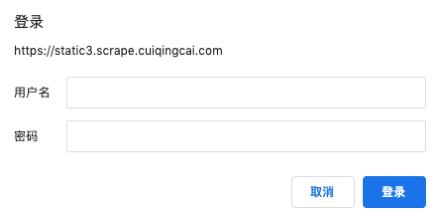
如果遇到了这种情况，那就是这个网站启用了基本身份认证，英文叫作 HTTP Basic Access Authentication。

In [20]:
from requests.auth import HTTPBasicAuth
r1 = requests.get('https://static3.scrape.cuiqingcai.com/', auth=HTTPBasicAuth('admin','a***n'), verify=False)
print(r1.status_code)

# ***************************** 或者 **********************************
r2 = requests.get('https://static3.scrape.cuiqingcai.com/', auth=('admin','admin'), verify=False)
print(r2.status_code)

# ***************************** 或者 **********************************
'''
import requests
from requests_oauthlib import OAuth1
url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
auth = OAuth1('YOUR_APP_KEY', 'YOUR_APP_SECRET',
              'USER_OAUTH_TOKEN', 'USER_OAUTH_TOKEN_SECRET')
requests.get(url, auth=auth)
更多详细的功能就可以参考 requests_oauthlib  的官方文档： https://requests-oauthlib.readthedocs.org/ ，在此就不再赘述了。
''';

401
200


## 7.代理设置
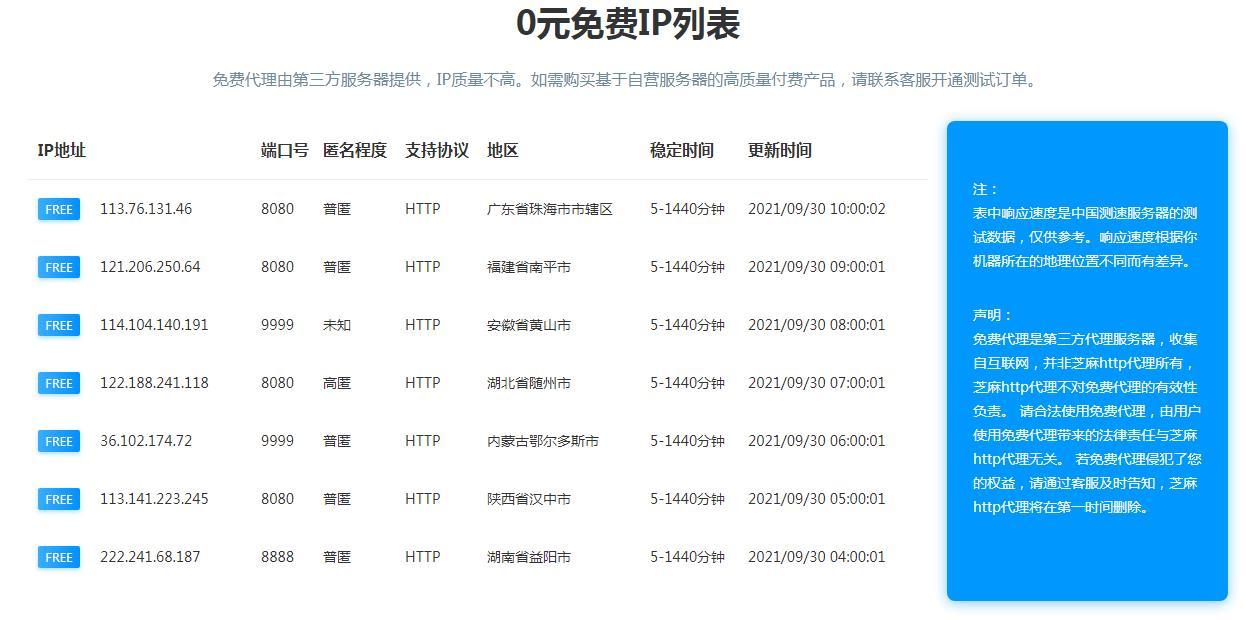
遇到反爬比较严重的，我们需要设置代理来解决这个问题，这就需要用到proxies参数。
### 7.1 http代理

### 7.2socks5代理
先pip install "requests[socks]"

## 8.Prepared Request
你有没有想过，get和post请求在requests内部是怎么实现的呢？  
实际上， requests在发送请求的时候在内部构造了一个Prepared Request类型的对象，并给这个对象赋予了各种参数，包括url、headers、data等等。然后直接把这个对象发送出去，得到一个Response对象，再解析即可。

In [21]:
from requests import Request, Session
url = 'http://httpbin.org/post'
data = {'name': 'fsw'}
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.116 Safari/537.36'}
request = Request('POST', url, data=data, headers=headers)

s = Session()
object = s.prepare_request(request)
r = s.send(object)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "fsw"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "8", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.116 Safari/537.36", 
    "X-Amzn-Trace-Id": "Root=1-6162cd39-3e352697201e63fa24e3af8e"
  }, 
  "json": null, 
  "origin": "111.3.212.41", 
  "url": "http://httpbin.org/post"
}

